# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
mars_soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = mars_soup.find('table', class_='table')
print(table.text)



id
terrestrial_date
sol
ls
month
min_temp
pressure


2
2012-08-16
10
155
6
-75.0
739.0


13
2012-08-17
11
156
6
-76.0
740.0


24
2012-08-18
12
156
6
-76.0
741.0


35
2012-08-19
13
157
6
-74.0
732.0


46
2012-08-20
14
157
6
-74.0
740.0


57
2012-08-21
15
158
6
-78.0
740.0


68
2012-08-22
16
158
6
-77.0
740.0


79
2012-08-23
17
159
6
-76.0
742.0


112
2012-08-27
21
161
6
-74.0
741.0


114
2012-08-28
22
162
6
-74.0
742.0


123
2012-08-29
23
162
6
-75.0
741.0


134
2012-08-30
24
163
6
-75.0
742.0


145
2012-08-31
25
163
6
-75.0
743.0


156
2012-09-01
26
164
6
-76.0
745.0


163
2012-09-02
27
164
6
-75.0
743.0


170
2012-09-03
28
165
6
-75.0
745.0


171
2012-09-04
29
166
6
-75.0
747.0


172
2012-09-05
30
166
6
-74.0
747.0


173
2012-09-06
31
167
6
-74.0
745.0


175
2012-09-08
33
168
6
-73.0
748.0


176
2012-09-10
34
168
6
-73.0
748.0


177
2012-09-11
35
169
6
-73.0
749.0


178
2012-09-12
36
169
6
-73.0
750.0


179
2012-09-13
37
170
6
-73.0
750.0


180
2012-09-14
38
171
6
-73.0
750.0


181


In [6]:
th=table.find_all('th')
th

[<th>id</th>,
 <th>terrestrial_date</th>,
 <th>sol</th>,
 <th>ls</th>,
 <th>month</th>,
 <th>min_temp</th>,
 <th>pressure</th>]

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
#AskBSC helped me for this part 
# Create an empty list
mars_facts = []
mars_header =[]
rows = table.find_all('tr')
# Loop through the scraped data to create a list of rows
for mars_headers in th:
    headings = mars_headers.text.strip()
    mars_header.append(headings)
for mars_row in rows:
    td = mars_row.find_all('td')
    row = [col.text for col in td]
    mars_facts.append(row)
    

In [8]:
mars_header

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [9]:
mars_facts

[[],
 ['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-7

In [10]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_db=pd.DataFrame(mars_facts,columns=mars_header)
mars_db=mars_db.dropna()

In [11]:
# Confirm DataFrame was created successfully
mars_db.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
5,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [12]:
# Examine data type of each column
mars_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1867 entries, 1 to 1867
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 116.7+ KB


In [13]:
# Change data types for data analysis
mars_db = mars_db.astype({"sol":'int',"ls":'int',"month":'int',"min_temp":"float","pressure":'float'})

In [14]:
#changing the panadas to datetime
mars_db.terrestrial_date = pd.to_datetime(mars_db.terrestrial_date , dayfirst=True)

In [15]:
# Confirm type changes were successful by examining data types again
mars_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1867 entries, 1 to 1867
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   object        
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(3), object(1)
memory usage: 94.8+ KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [16]:
# 1. How many months are there on Mars?
mars_db['month'].max()

12

In [17]:
# 2. How many Martian days' worth of data are there?
mars_db['sol'].max()

1977

In [18]:
# 3. What is the average low temperature by month?
#group by month
mars_temp=mars_db.groupby(['month']).mean()['min_temp']
mars_temp

C:\Users\steph\AppData\Local\Temp\ipykernel_13536\1076394615.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mars_temp=mars_db.groupby(['month']).mean()['min_temp']


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

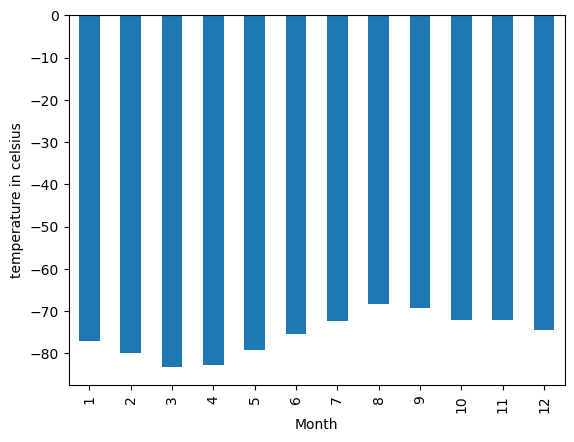

In [19]:
# Plot the average temperature by month
mars_temp.plot(x="month",y="min_temp",kind="bar")
plt.xlabel("Month")
plt.ylabel("temperature in celsius")
plt.show()

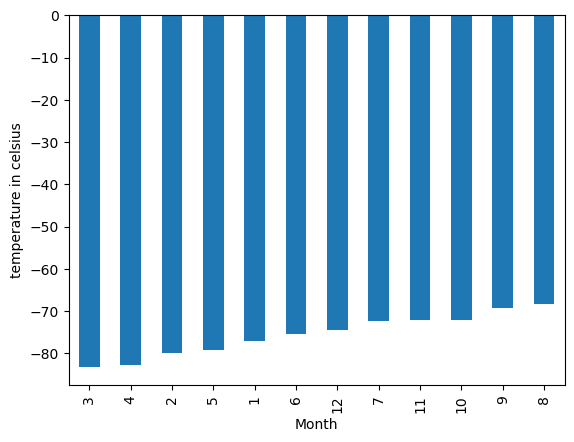

In [20]:
sorted_mars=mars_temp.sort_values()
sorted_mars.plot(x="month",y="min_temp",kind="bar")
plt.xlabel("Month")
plt.ylabel("temperature in celsius")
plt.show()

In [21]:
# Identify the coldest and hottest months in Curiosity's location
# for the idx https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.idxmax.html
mars_min=mars_temp.idxmin()
mars_max = mars_temp.idxmax()
print(f"the min temp is {mars_min} with a temperature {mars_temp.min()}")
print(f"the max temp is {mars_max} with a temperature {mars_temp.max()}")

the min temp is 3 with a temperature -83.30729166666667
the max temp is 8 with a temperature -68.38297872340425


In [22]:
# 4. Average pressure by Martian month
mars_pressure =mars_db.groupby(['month']).mean()['pressure']
mars_pressure

C:\Users\steph\AppData\Local\Temp\ipykernel_13536\3312319701.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mars_pressure =mars_db.groupby(['month']).mean()['pressure']


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

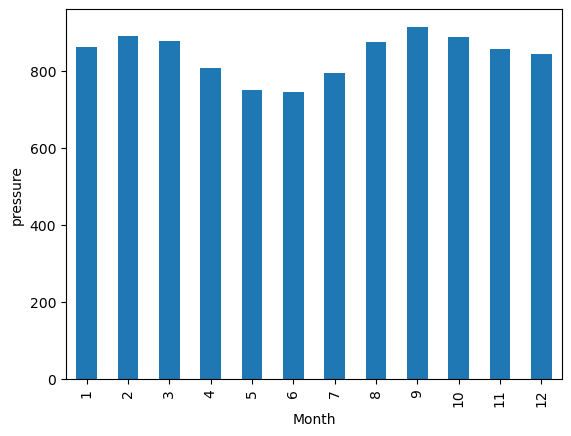

In [23]:
# Plot the average pressure by month
mars_pressure.plot(x="month",y="pressure",kind="bar")
plt.xlabel("Month")
plt.ylabel("pressure")
plt.show()

In [24]:
mars_minpress=mars_pressure.idxmin()
mars_maxpress= mars_pressure.idxmax()
print(f"the min temp is {mars_minpress} with a temperature {mars_pressure.min()}")
print(f"the max temp is {mars_maxpress} with a temperature {mars_pressure.max()}")

the min temp is 6 with a temperature 745.0544217687075
the max temp is 9 with a temperature 913.3059701492538


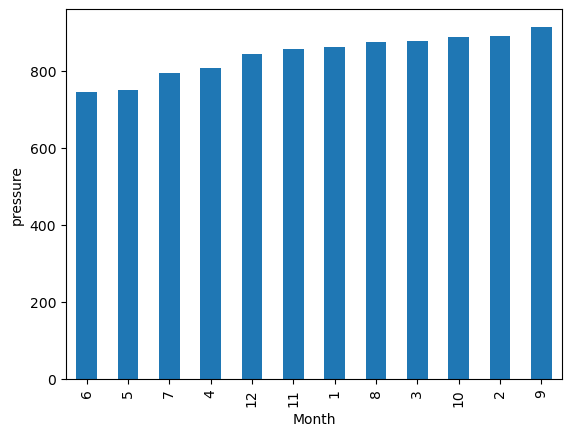

In [25]:
# Plot the average pressure by month
sorted_marspress=mars_pressure.sort_values()
sorted_marspress.plot(x="month",y="pressure",kind="bar")
plt.xlabel("Month")
plt.ylabel("pressure")
plt.show()

In [29]:
# 5. How many terrestrial (earth) days are there in a Martian year?
mars_min_temp = mars_db["min_temp"]
mars_days = mars_db ["sol"]
mars_days

1         10
2         11
3         12
4         13
5         14
        ... 
1863    1973
1864    1974
1865    1975
1866    1976
1867    1977
Name: sol, Length: 1867, dtype: int32

Text(0, 0.5, 'min_temp')

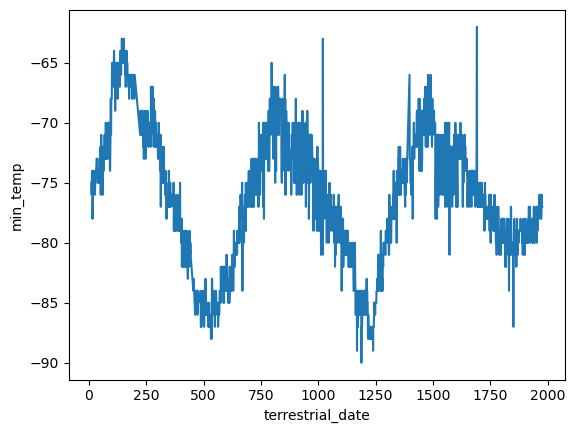

In [31]:
plt.plot(mars_days,mars_min_temp)
plt.xlabel("terrestrial_date")
plt.ylabel("min_temp")

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [33]:
# Write the data to a CSV
mars_db.to_csv("./mars_data.csv")
mars_pressure.to_csv("./mars_pressure.csv")
mars_temp.to_csv("./mars_temp.csv")


In [34]:
browser.quit()